In [135]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [138]:
# Basic statistics
print(df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

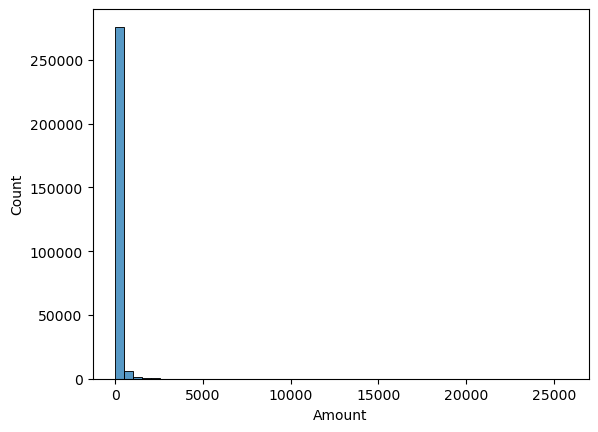

In [141]:
# Visualizing transaction amounts
sns.histplot(df['Amount'], bins=50)
plt.show()

In [143]:
# Handling missing values
df = df.dropna()

In [145]:
# Normalize the 'Amount' and 'Time' features
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [147]:
# Initial outlier detection using Z-score
df['zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
outliers = df[df['zscore'].abs() > 3]

# Isolation Forest

In [150]:
from sklearn.ensemble import IsolationForest

In [152]:
# Initialize the model
model = IsolationForest(contamination=0.01, random_state=42)


In [154]:
# Fit the model on relevant features
model.fit(df[['Amount', 'Time']])

IsolationForest(contamination=0.01, random_state=42)

In [156]:
# Predict anomalies
df['anomaly'] = model.predict(df[['Amount', 'Time']])

In [157]:
# Anomalies are labeled as -1
anomalies = df[df['anomaly'] == -1]
print(anomalies)

            Time        V1         V2        V3        V4        V5        V6  \
51     -1.995825 -1.004929  -0.985978 -0.038039  3.710061 -6.631951  5.122103   
89     -1.995341 -0.773293  -4.146007 -0.932038  0.027094 -1.698307  0.460188   
140    -1.994751 -5.101877   1.897022 -3.458034 -1.277543 -5.517758  2.098366   
150    -1.994625 -1.640014  -0.479831  1.613630  2.997979 -3.803788  5.051812   
164    -1.994414 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
...          ...       ...        ...       ...       ...       ...       ...   
284290  1.631803  0.311762  -2.602832 -2.942923  1.880832 -0.090804 -0.480139   
284383  1.633740 -0.065120  -4.114668 -2.106854 -0.137339 -1.384530  0.239999   
284497  1.635867 -0.801222  -4.874934 -3.195666  1.177224 -1.299393 -0.397073   
284528  1.636477  0.643223  -3.380753 -3.890511 -0.386292 -0.266371 -0.822619   
284712  1.640205  0.470194  -1.619056 -2.258427  4.440719  0.202024 -0.458243   

              V7        V8 

In [160]:
from sklearn.metrics import confusion_matrix, classification_report

In [162]:
# Assuming you have the 'Class' column as the ground truth
y_true = df['Class']
y_pred = df['anomaly']

In [164]:
# Confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

[[     0      0      0]
 [  2839      0 281476]
 [    10      0    482]]


C:\Users\chira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    284315
           1       0.00      0.98      0.00       492

    accuracy                           0.00    284807
   macro avg       0.00      0.33      0.00    284807
weighted avg       0.00      0.00      0.00    284807



C:\Users\chira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chira\anaconda3\Lib\site-packages\sklea

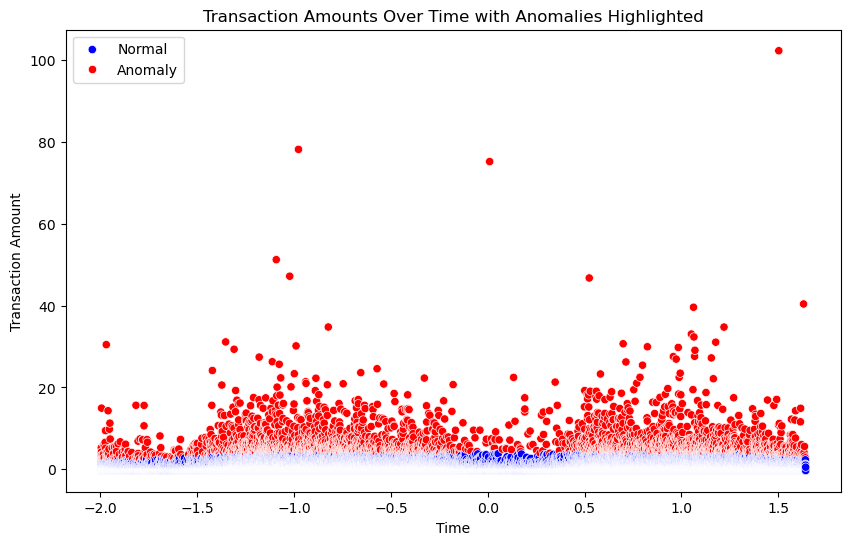

In [174]:
# Assuming 'Time' is in your dataset and represents the time of the transaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='anomaly', data=df, palette={1: 'blue', -1: 'red'})
plt.title('Transaction Amounts Over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend(['Normal', 'Anomaly'])
plt.show()

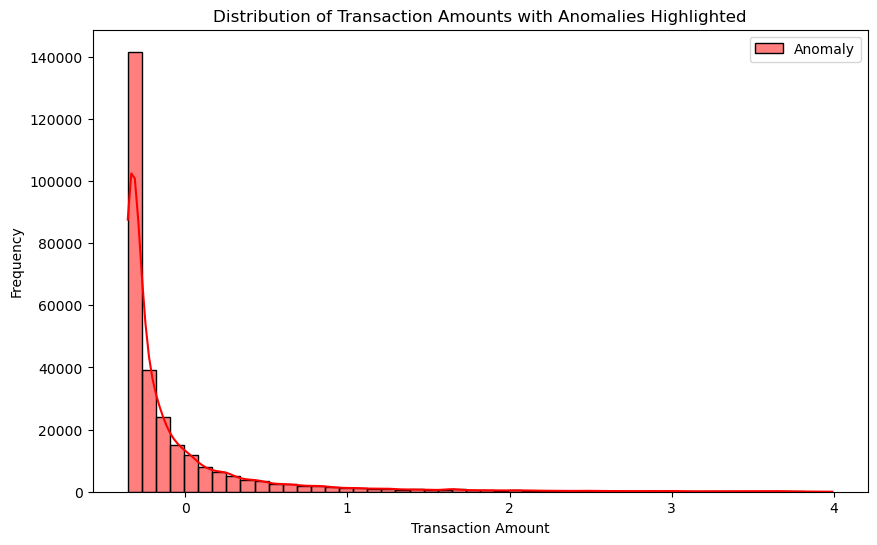

In [178]:
#Plotting Anomalies by Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df[df['anomaly'] == 0]['Amount'], bins=50, color='blue', kde=True, label='Normal')
sns.histplot(df[df['anomaly'] == 1]['Amount'], bins=50, color='red', kde=True, label='Anomaly')
plt.title('Distribution of Transaction Amounts with Anomalies Highlighted')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()
